In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [5]:
# Convert NumPy arrays to pandas DataFrame
X_df = pd.DataFrame(X, columns=adult.data.feature_names)
y_df = pd.DataFrame(y, columns=['income'])

# Concatenate features and target into a single DataFrame
full_df = pd.concat([X_df, y_df], axis=1)

In [6]:
full_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
full_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
# unique values in each columns
for column in full_df:
    print(column)
    print(full_df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support

In "income" column there are 4 unique values but with same meaning. Soconverting <=50k. to <=50k and >50k. to >50k

In [10]:
# replace values in the 'Income' column
full_df['income'] = full_df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

Checking the unique values after doing the midification

In [11]:
# unique values in each columns
for column in full_df:
    print(column)
    print(full_df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support

There "?" in the dataframe. So replace them with NaN

In [12]:
# replace '?' with NaN
full_df.replace('?', np.nan, inplace=True)

Checking unique values after modification

In [13]:
# unique values in each columns
for column in full_df:
    print(column)
    print(full_df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' na

# Handling the Null values

Getting the count of null values in the dataframe

In [14]:
# number of NaN values in each row
no_of_nan_raws = full_df.isna().sum(axis=1)

# total number of rows with NaN values
total_no_of_nan_raws = (no_of_nan_raws > 0).sum()

print("Count of Null values in the dataframe:", total_no_of_nan_raws)


Count of Null values in the dataframe: 3620


**Handling Workclass column null values**

We should consider income of people when we handdling the null values. And to get a accurate values we should devide the datadrame in 2 parts as <=50k and >50k. BY doing so we can get the most accurate values.

In [15]:
less_50k = full_df[full_df['income'] == '<=50K']
greater_50k = full_df[full_df['income'] == '>50K']

In [16]:
less_50k.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K


In [17]:
greater_50k.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


In [18]:
#Extracting the 'WorkClass' column count based on income

less_50K_workClass = less_50k['workclass'].value_counts()
greater_50K_workClass = greater_50k['workclass'].value_counts()

In [19]:
less_50K_workClass

Private             26519
Self-emp-not-inc     2785
Local-gov            2209
State-gov            1451
Federal-gov           871
Self-emp-inc          757
Without-pay            19
Never-worked           10
Name: workclass, dtype: int64

In [20]:
greater_50K_workClass

Private             7387
Self-emp-not-inc    1077
Self-emp-inc         938
Local-gov            927
Federal-gov          561
State-gov            530
Without-pay            2
Name: workclass, dtype: int64

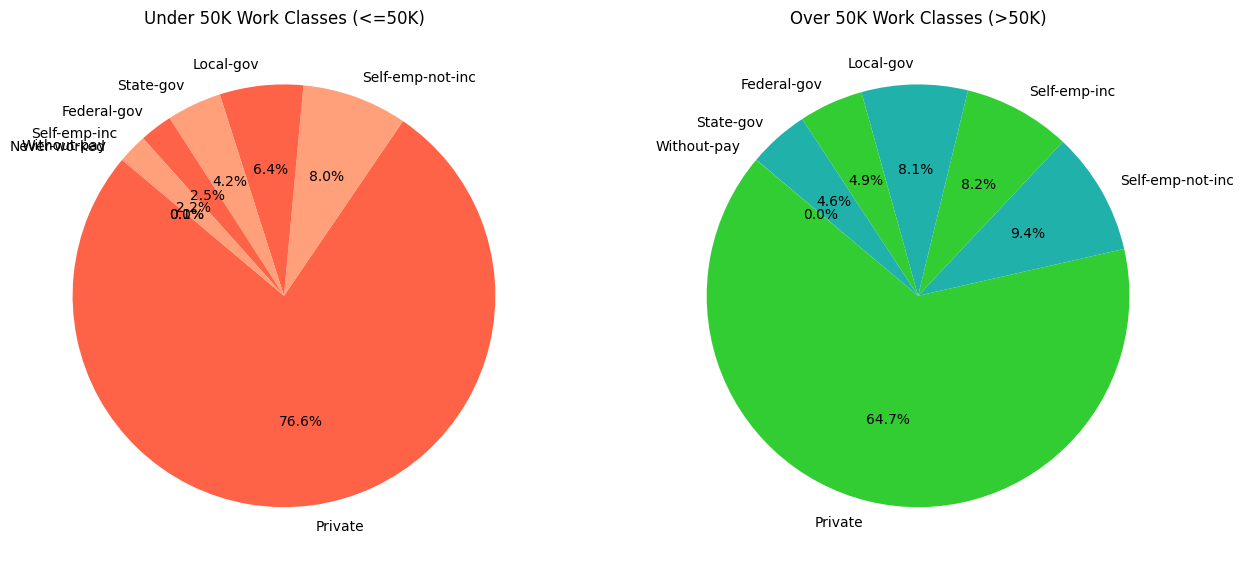

In [21]:
color_1 = ['#FF6347', '#FFA07A']
color_2 = ['#32CD32', '#20B2AA']

# Plotting them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plotting pie chart for under 50K work classes
ax1.pie(less_50K_workClass.values, labels=less_50K_workClass.index, colors=color_1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Under 50K Work Classes (<=50K)')

# Plotting pie chart for over 50K work classes
ax2.pie(greater_50K_workClass.values, labels=greater_50K_workClass.index, colors=color_2, autopct='%1.1f%%', startangle=140)
ax2.set_title('Over 50K Work Classes (>50K)')

plt.show()

Filling the missing values in workclass with the most repeated value for both less and greater than 50k

In [22]:
#Filling the column workclass for <=50k with the most repeated value
mode_less_50k_workclass = less_50k['workclass'].mode()[0]
mode_greater_50k_workclass = greater_50k['workclass'].mode()[0]

In [23]:
print('Mode of workclass when the income is >50k:', mode_less_50k_workclass )
print('Mode of workclass when the income is <=50k:', mode_greater_50k_workclass)

Mode of workclass when the income is >50k: Private
Mode of workclass when the income is <=50k: Private


So in the dataset missing values in both greater and less than 50k will be filled with "private"

In [24]:
#Filling the workclass columns
full_df.loc[(full_df['income'] == '<=50K') & (full_df['workclass'].isnull()), 'workclass'] = mode_less_50k_workclass
full_df.loc[(full_df['income'] == '>50K') & (full_df['workclass'].isnull()), 'workclass'] = mode_greater_50k_workclass

checking for modifications

In [25]:
#check unique values of Work_class column
print(full_df['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [26]:
full_df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

The workclass missing values are handdled.

Handling the null values in native-country column

In [27]:
# Extract the 'native-country' column based on income

less_50K_country = less_50k['native-country'].value_counts()
greater_50K_country = greater_50k['native-country'].value_counts()

In [28]:
# find native-country mode for each income class
mode_less_50k_country = less_50k['native-country'].mode()[0]
mode_greater_50k_country = greater_50k['native-country'].mode()[0]

In [29]:
print('Mode of native-country when income is <=50k:', mode_less_50k_country)
print('Mode of native-country when income is >50k:', mode_greater_50k_country)

Mode of native-country when income is <=50k: United-States
Mode of native-country when income is >50k: United-States


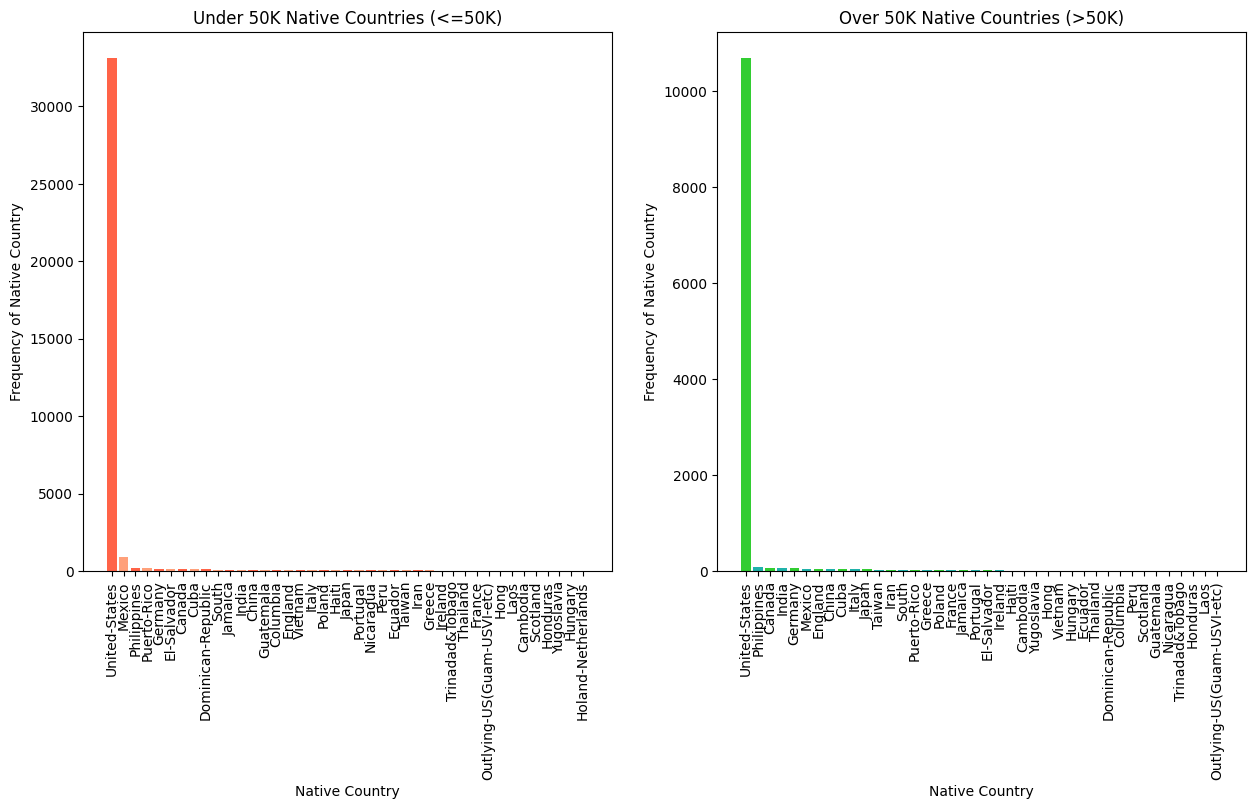

In [30]:
color_1 = ['#FF6347', '#FFA07A']
color_2 = ['#32CD32', '#20B2AA']

# Plotting them side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plotting bar graph for under 50K native countries
ax1.bar(less_50K_country.index, less_50K_country.values, color=color_1)
ax1.set_xlabel('Native Country')
ax1.set_ylabel('Frequency of Native Country')
ax1.set_title('Under 50K Native Countries (<=50K)')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Plotting bar graph for over 50K native countries
ax2.bar(greater_50K_country.index, greater_50K_country.values, color=color_2)
ax2.set_xlabel('Native Country')
ax2.set_ylabel('Frequency of Native Country')
ax2.set_title('Over 50K Native Countries (>50K)')
ax2.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [31]:
# Fill missing values based on income class
full_df.loc[(full_df['income'] == '<=50K') & (full_df['native-country'].isnull()), 'native-country'] = mode_less_50k_country
full_df.loc[(full_df['income'] == '>50K') & (full_df['native-country'].isnull()), 'native-country'] = mode_greater_50k_country

Checking for modifications

In [32]:
full_df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
dtype: int64

Native country column has been handdled.

**Handdling occupation column null values**

In [33]:
# Extract the 'Occupation' column based on income

less_50K_occupation = less_50k['occupation'].value_counts()
greater_50K_occupation = greater_50k['occupation'].value_counts()

Filling the missing values in occupation with the most repeated value for both less and greater than 50k.

In [34]:
# find Occupation mode for each income class
mode_less_50k_occupation = less_50k['occupation'].mode()[0]
mode_greater_50k_occupation = greater_50k['occupation'].mode()[0]

In [35]:
print('Mode of occupation column when income is <=50k:', mode_less_50k_occupation)
print('Mode of occupation column when income is >50k:', mode_greater_50k_occupation)

Mode of occupation column when income is <=50k: Adm-clerical
Mode of occupation column when income is >50k: Exec-managerial


In [36]:
# Fill missing values based on income class
full_df.loc[(full_df['income'] == '<=50K') & (full_df['occupation'].isnull()), 'occupation'] = mode_less_50k_country
full_df.loc[(full_df['income'] == '>50K') & (full_df['occupation'].isnull()), 'occupation'] = mode_greater_50k_country

In [37]:
full_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Occupation column has been handdled.

# Renove duplicate rows

In [38]:
full_df.shape

(48842, 15)

In [39]:
# Check how many duplicate rows in the DF
duplicate_rows_in_full_df = full_df.duplicated().sum()

print("Count of duplicate rows in the dataframe :", duplicate_rows_in_full_df)

Count of duplicate rows in the dataframe : 52


In [40]:
# Remove duplicates from DataFrame
full_df.drop_duplicates(keep='first', inplace=True)

checking wheather the dupplicate rows has been handdled.

In [41]:
new = full_df.duplicated().sum()
print("nw", new)

nw 0


Duplicate rows has been handdled.

# Standernizing the data

In [42]:
#Coverting all the catogarical values to lowercase
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for column in categorical_columns:
    full_df[column] = full_df[column].str.lower().str.strip()

In [43]:
# unique values in each columns
for column in full_df:
    print(column)
    print(full_df[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay' 'never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']


occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' 'unite

# Checking coorelations with numeric values

<Axes: >

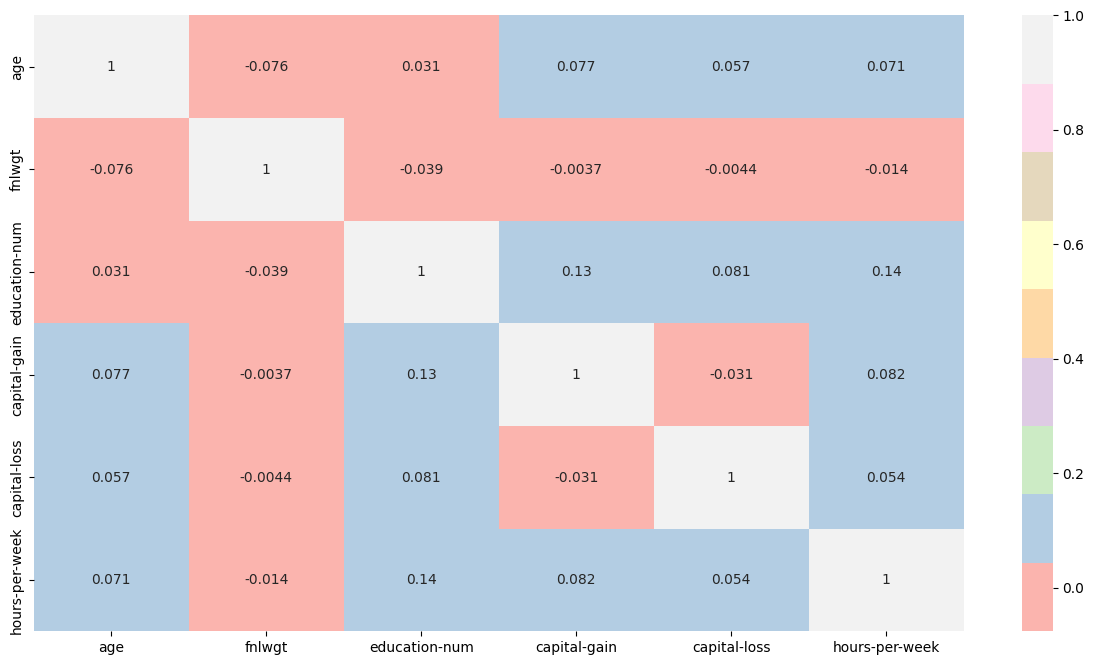

In [44]:
numeric_value_data = full_df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_value_data.corr(), annot=True, cmap="Pastel1")

We need to covert income to binary in order to get the correlation because only numeric values are compared in this relation

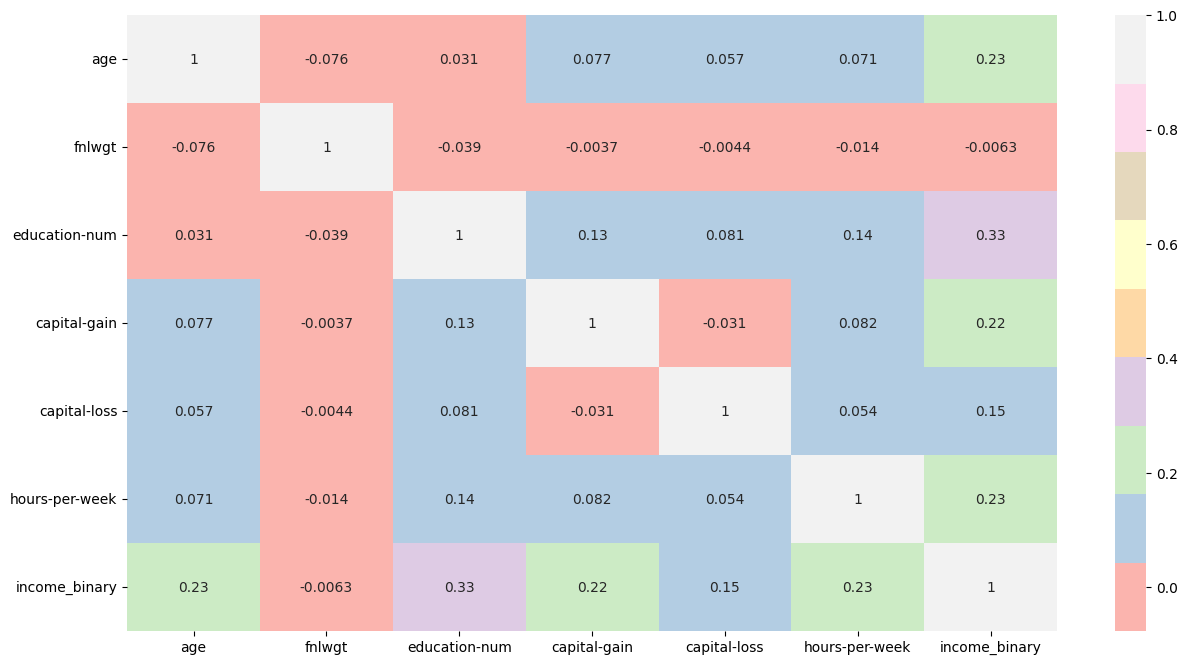

In [45]:
# Convert the 'income' column to binary values
full_df['income_binary'] = np.where(full_df['income'] == '>50K', 1, 0)

# Select numeric columns including the new 'Income_binary' column
numeric_data_with_income = full_df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_data_with_income.corr(), annot=True, cmap="Pastel1")
plt.show()

In [46]:
full_df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K,0


In [47]:
# Drop the 'income_binary' column
full_df.drop(columns=['income_binary'], inplace=True)

In [48]:
full_df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K


And also by considering the coorelation graph values (-0.0063) and also there is no define meaning to final weight(fnlwgt) it will be removed.

In [49]:
# Remove the 'final_Weight' column from the dataframe
full_df.drop(columns=['fnlwgt'], inplace=True)

In [50]:
full_df.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,state-gov,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K


# Handdling Outliers

**Handdling Age**

Before handdling age

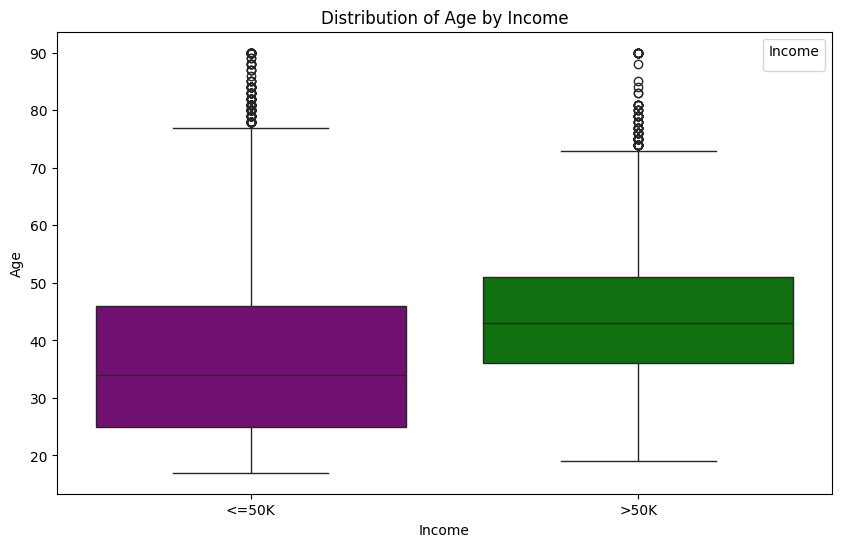

In [51]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Create a box plot for the "Age" column with hue for income group
plt.figure(figsize=(10, 6))
sns.boxplot(y=full_df["age"], x=full_df["income"], hue=full_df["income"], palette={'>50K': color_1, '<=50K': color_2})
plt.title("Distribution of Age by Income")
plt.ylabel("Age")
plt.xlabel("Income")
plt.legend(title='Income', loc='upper right')
plt.show()

In [52]:
# Calculate the interquartile range (IQR) for 'age'
Q1 = full_df['age'].quantile(0.25)
Q3 = full_df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers in 'age' based on lower and upper bounds
outliers_count = full_df[(full_df['age'] < lower_bound) | (full_df['age'] > upper_bound)].shape[0]

print("Number of outliers in 'age':", outliers_count)

Number of outliers in 'age': 215


In [53]:
# Handling outliers in 'age' using IQR method
Q1 = full_df['age'].quantile(0.25)
Q3 = full_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
full_df['age'] = full_df['age'].apply(lambda x: full_df['age'].median() if x < lower_bound or x > upper_bound else x)

In [54]:
# Cap outliers at the upper bound value (rounded down to the nearest whole number)
full_df.loc[(full_df['income'] == '>50K') & (full_df['age'] > upper_bound), 'age'] = int(upper_bound)

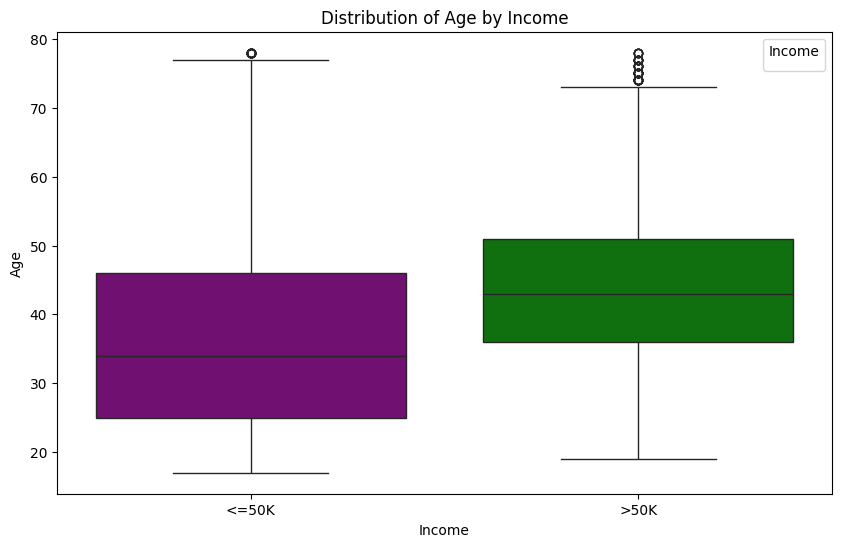

In [55]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Create a box plot for the "Age" column with hue for income group
plt.figure(figsize=(10, 6))
sns.boxplot(y=full_df["age"], x=full_df["income"], hue=full_df["income"], palette={'>50K': color_1, '<=50K': color_2})
plt.title("Distribution of Age by Income")
plt.ylabel("Age")
plt.xlabel("Income")
plt.legend(title='Income', loc='upper right')
plt.show()

By considering the above box plot we can see even though we hanndle outliers there are some from above the upper bound. instead of removing them I decided to adjust them

In [56]:
# Cap outliers at the upper bound value for income <=50K and age > upper bound
full_df.loc[(full_df['income'] == '<=50K') & (full_df['age'] > upper_bound), 'age'] = int(upper_bound)

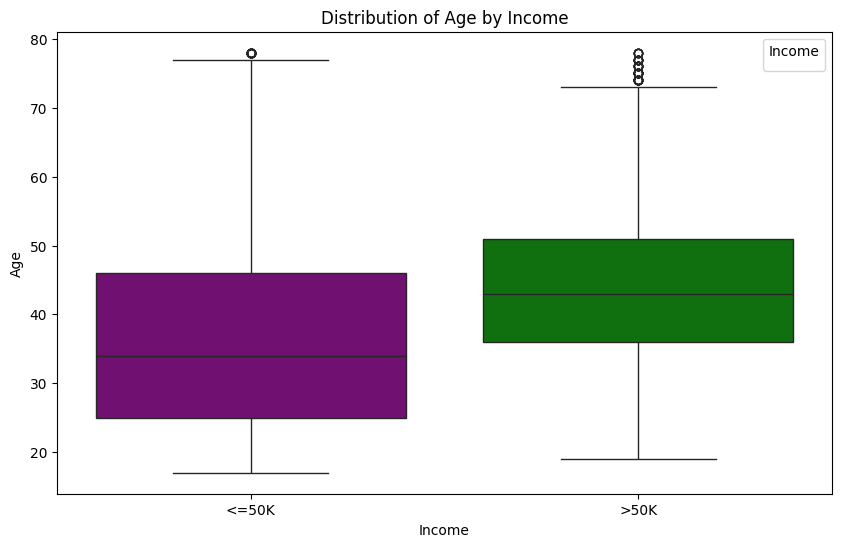

In [57]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Create a box plot for the "Age" column with hue for income group
plt.figure(figsize=(10, 6))
sns.boxplot(y=full_df["age"], x=full_df["income"], hue=full_df["income"], palette={'>50K': color_1, '<=50K': color_2})
plt.title("Distribution of Age by Income")
plt.ylabel("Age")
plt.xlabel("Income")
plt.legend(title='Income', loc='upper right')
plt.show()

In [58]:
# get count of rows where income is >50K and age is greater than upper bound
outliers_greater_50K_age = full_df[(full_df['income'] == '>50K') & (full_df['age'] > upper_bound)]

print("Count of rows with income less than 50K and age less than upper bound:", len(outliers_greater_50K_age))

# get count of rows where income is <=50K and age is greater than upper bound
outliers_less_50k_age = full_df[(full_df['income'] == '<=50K') & (full_df['age'] > upper_bound)]

print("Number of rows with income <=50K and age > upper bound:", len(outliers_less_50k_age))

Count of rows with income less than 50K and age less than upper bound: 0
Number of rows with income <=50K and age > upper bound: 0


**Handdling capital gain and capital loss**

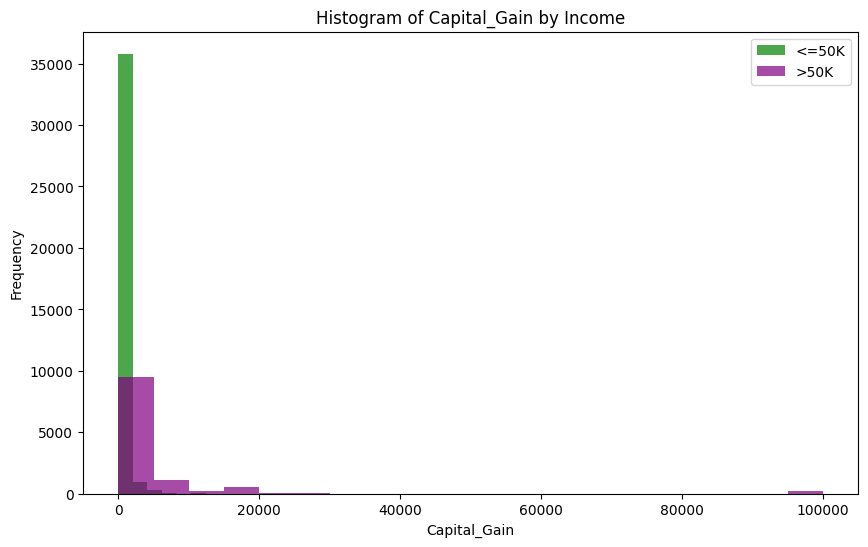

In [59]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Plot histogram for Capital_Gain column by income group
plt.figure(figsize=(10, 6))
plt.hist(full_df[full_df['income'] == '<=50K']['capital-gain'], bins=20, color=color_1, alpha=0.7, label='<=50K')
plt.hist(full_df[full_df['income'] == '>50K']['capital-gain'], bins=20, color=color_2, alpha=0.7, label='>50K')
plt.title('Histogram of Capital_Gain by Income')
plt.xlabel('Capital_Gain')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [60]:
# Handling outliers in 'capital-gain' and 'capital-loss' by clipping
full_df['capital-gain'] = full_df['capital-gain'].clip(lower=full_df['capital-gain'].quantile(0.05), upper=full_df['capital-gain'].quantile(0.95))

In [61]:
full_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,state-gov,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K
1,50.0,self-emp-not-inc,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50K
2,38.0,private,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50K
3,53.0,private,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50K
4,28.0,private,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50K


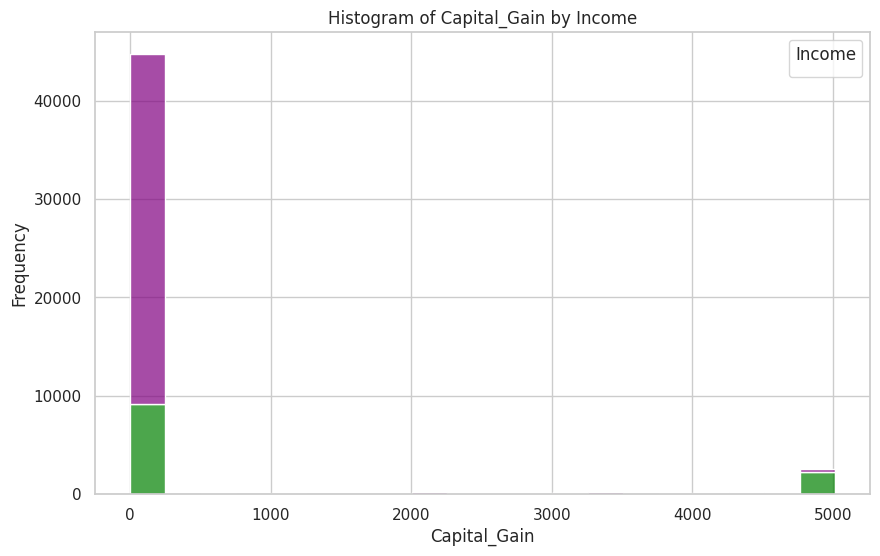

In [62]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Set style
sns.set(style="whitegrid")

# Plot histogram for Capital_Gain column by income group
plt.figure(figsize=(10, 6))
sns.histplot(data=full_df, x='capital-gain', bins=20, hue='income', palette={'>50K': color_1, '<=50K': color_2}, alpha=0.7, multiple="stack")
plt.title('Histogram of Capital_Gain by Income')
plt.xlabel('Capital_Gain')
plt.ylabel('Frequency')
plt.legend(title='Income', loc='upper right')
plt.show()


<ipython-input-63-d29d0cb04d8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_df, x='income', y='capital-gain', palette={'>50K': color_1, '<=50K': color_2})


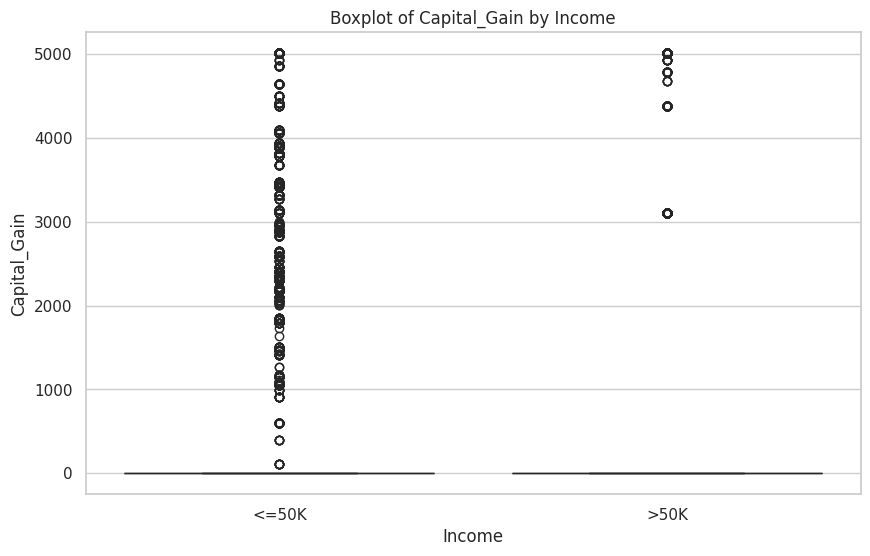

In [63]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Set style
sns.set(style="whitegrid")

# Plot boxplot for Capital_Gain column by income group
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='income', y='capital-gain', palette={'>50K': color_1, '<=50K': color_2})
plt.title('Boxplot of Capital_Gain by Income')
plt.xlabel('Income')
plt.ylabel('Capital_Gain')
plt.show()


**Handdling hours per week**

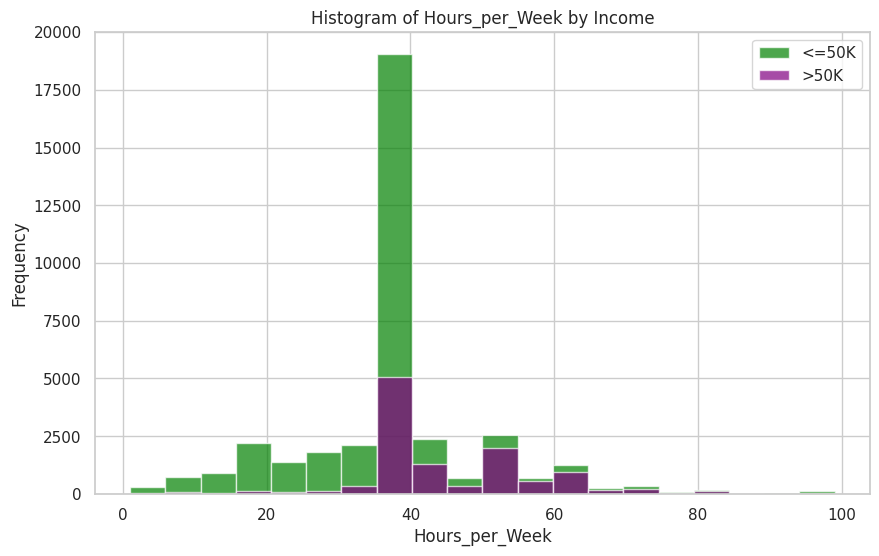

In [64]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Plot histogram for Capital_Gain column by income group
plt.figure(figsize=(10, 6))
plt.hist(full_df[full_df['income'] == '<=50K']['hours-per-week'], bins=20, color=color_1, alpha=0.7, label='<=50K')
plt.hist(full_df[full_df['income'] == '>50K']['hours-per-week'], bins=20, color=color_2, alpha=0.7, label='>50K')
plt.title('Histogram of Hours_per_Week by Income')
plt.xlabel('Hours_per_Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [65]:
# Select Hours_per_Week data for income >50k
hours_greater_50K = full_df[full_df['income'] == '>50K']['hours-per-week']

# Calculate IQR
Q1 = hours_greater_50K.quantile(0.25)
Q3 = hours_greater_50K.quantile(0.75)
IQR = Q3 - Q1

# Lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

Lower limit: 25.0
Upper limit: 65.0


In [66]:
# Cap outliers at the lower bound value (rounded up to the nearest whole number)
full_df.loc[(full_df['income'] == '>50K') & (full_df['hours-per-week'] < lower_bound), 'hours-per-week'] = math.ceil(lower_bound)

# Cap outliers at the upper bound value for income >50K and Hours_per_Week > upper bound
full_df.loc[(full_df['income'] == '>50K') & (full_df['hours-per-week'] > upper_bound), 'hours-per-week'] = int(upper_bound)

In [67]:
# Select Hours_per_Week data for income <= 50k
hours_less_50K = full_df[full_df['income'] == '<=50K']['hours-per-week']

# Calculate IQR
Q1 = hours_less_50K.quantile(0.25)
Q3 = hours_less_50K.quantile(0.75)
IQR = Q3 - Q1

# Lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

Lower limit: 27.5
Upper limit: 47.5


In [68]:
# Cap outliers at the lower bound value (rounded up to the nearest whole number)
full_df.loc[(full_df['income'] == '<=50K') & (full_df['hours-per-week'] < lower_bound), 'hours-per-week'] = math.ceil(lower_bound)

# Cap outliers at the upper bound value for income <=50K and Hours_per_Week > upper bound
full_df.loc[(full_df['income'] == '<=50K') & (full_df['hours-per-week'] > upper_bound), 'hours-per-week'] = int(upper_bound)

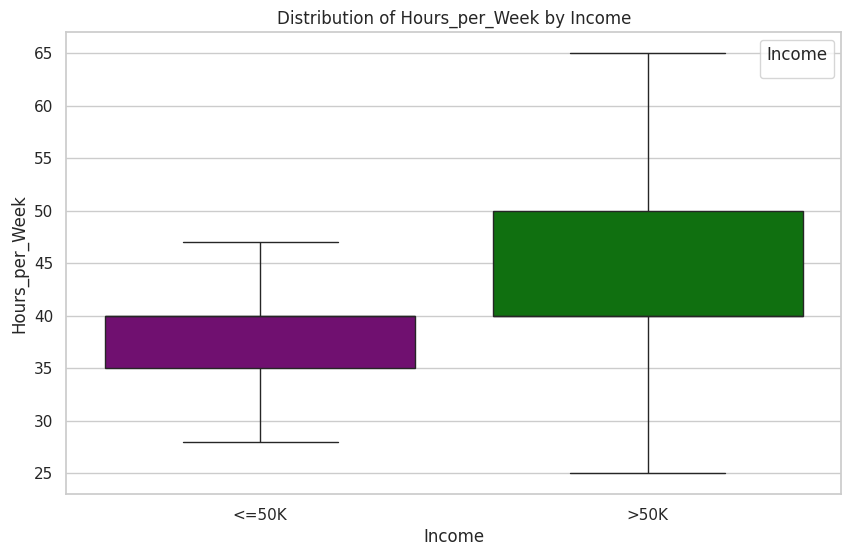

In [69]:
# Define colors for income groups
color_1 = 'green'
color_2 = 'purple'

# Create a box plot for the "Hours_per_Week" column with hue for income group
plt.figure(figsize=(10, 6))
sns.boxplot(y=full_df["hours-per-week"], x=full_df["income"], hue=full_df["income"], palette={'>50K': color_1, '<=50K': color_2})
plt.title("Distribution of Hours_per_Week by Income")
plt.ylabel("Hours_per_Week")
plt.xlabel("Income")
plt.legend(title='Income', loc='upper right')
plt.show()

# Data Type conversion

In [70]:
full_df.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,state-gov,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50K


In [71]:
# Convert categorical columns to categorical data type
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in cat_columns:
    full_df[col] = full_df[col].astype('category')

In [72]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  float64 
 1   workclass       48790 non-null  category
 2   education       48790 non-null  category
 3   education-num   48790 non-null  int64   
 4   marital-status  48790 non-null  category
 5   occupation      48790 non-null  category
 6   relationship    48790 non-null  category
 7   race            48790 non-null  category
 8   sex             48790 non-null  category
 9   capital-gain    48790 non-null  int64   
 10  capital-loss    48790 non-null  int64   
 11  hours-per-week  48790 non-null  int64   
 12  native-country  48790 non-null  category
 13  income          48790 non-null  category
dtypes: category(9), float64(1), int64(4)
memory usage: 2.7 MB


# Encoding categirical column

In [73]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for col in cat_columns:
    full_df[col] = label_encoder.fit_transform(full_df[col])

In [74]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48790 non-null  float64
 1   workclass       48790 non-null  int64  
 2   education       48790 non-null  int64  
 3   education-num   48790 non-null  int64  
 4   marital-status  48790 non-null  int64  
 5   occupation      48790 non-null  int64  
 6   relationship    48790 non-null  int64  
 7   race            48790 non-null  int64  
 8   sex             48790 non-null  int64  
 9   capital-gain    48790 non-null  int64  
 10  capital-loss    48790 non-null  int64  
 11  hours-per-week  48790 non-null  int64  
 12  native-country  48790 non-null  int64  
 13  income          48790 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.6 MB


# Check for Coorelations

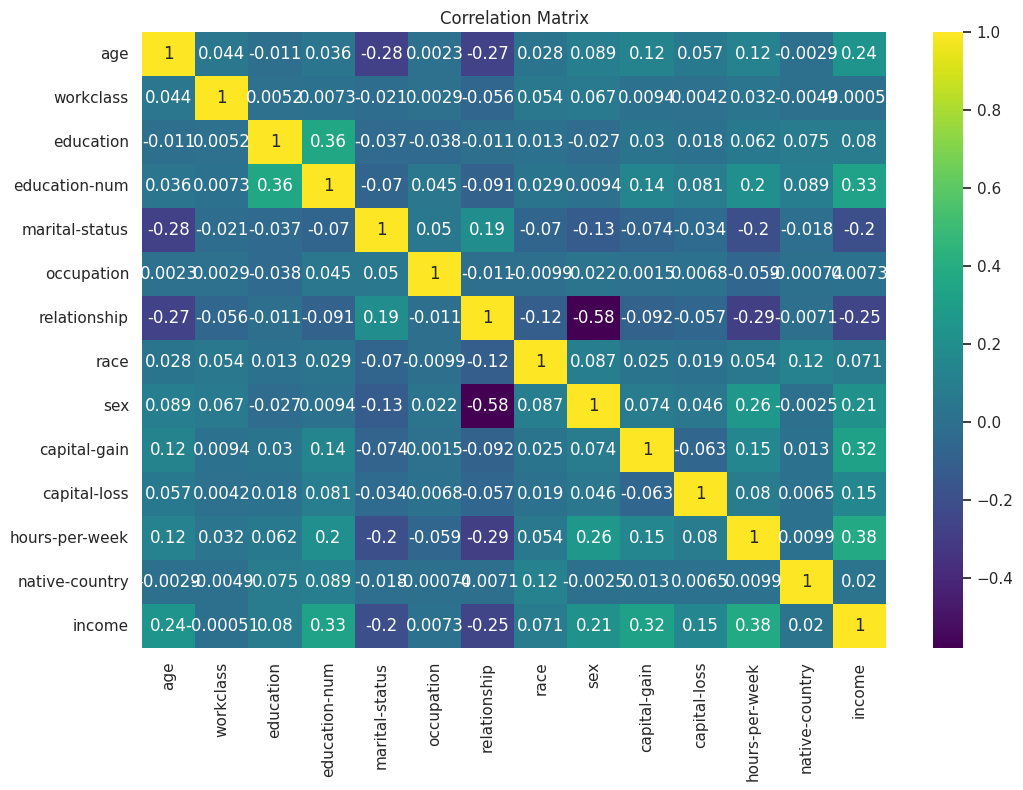

In [75]:
# Calculate the correlation matrix
correlation_matrix = full_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [76]:
# Calculate the correlation matrix
correlation_matrix = full_df.corr()

# Extract correlation with the target variable
correlation_income_values = correlation_matrix['income'].sort_values(ascending=False)

print(correlation_income_values)

income            1.000000
hours-per-week    0.375383
education-num     0.332802
capital-gain      0.317887
age               0.238085
sex               0.214639
capital-loss      0.147542
education         0.080118
race              0.070970
native-country    0.020161
occupation        0.007275
workclass        -0.000508
marital-status   -0.198855
relationship     -0.253175
Name: income, dtype: float64


hours-per-week:

Relation: The number of hours worked per week and income are positively correlated. Individuals who put in longer hours at work typically earn more money.

education-num:

Relation:Income and education-num (years of education) have a positive association. Higher wages are often correlated with higher levels of schooling.

capital-gain:

Relation: The relationship between income and capital gains is favourable. Incomes are positively correlated with capital gains.

age:

Relation: Between age and income, there is a positive association. Incomes are often greater for older people.

sex:

Relation: Income and sex (probably male) are positively correlated. In general, men make more money than women do.

capital-loss:

Relation: The relationship between income and capital loss is positive. bigger wages are correlated with bigger capital losses.

education:

Relation: Education and income have a good relationship. Incomes are positively correlated with education levels.

race:

Relation: There is a positive relationship between income and race, at least for some races. The salaries of some racial or ethnic groups could be greater.

native-country:

Relation: The relationship between income and nation of origin is positive. People from particular nations could make more money.

occupation:

Relation: The relationship between income and occupation is rather favourable. There may be a correlation between specific professions and increased earnings.

workclass:

Relation: There is very little relationship between income and labour class.

marital-status:

Relation: The income and married status have a negative association. There is a correlation between certain marital statuses and decreased earnings.

relationship:

Relation: The association between income and relationship is negatively correlated. Certain marital statuses might be linked to worse salaries.

**Remove irrelavent features**

In [77]:
full_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50.0,5,9,13,2,3,0,4,1,0,0,28,38,0
2,38.0,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53.0,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28.0,3,9,13,2,9,5,2,0,0,0,40,4,0


In [78]:
# List of columns to remove
remove_columns = ['workclass', 'education', 'race', 'native-country']

# Drop the columns from the DataFrame
full_df.drop(columns=remove_columns, inplace=True)

In [79]:
full_df.head()

,age,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39.0,13,4,0,1,1,2174,0,40,0
1,50.0,13,2,3,0,1,0,0,28,0
2,38.0,9,0,5,1,1,0,0,40,0
3,53.0,7,2,5,0,1,0,0,40,0
4,28.0,13,2,9,5,0,0,0,40,0


# Feature Scalling

In [80]:
scaler = StandardScaler()

# features to scale
scalling_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Applying Standardization to the specified columns
full_df[scalling_columns] = scaler.fit_transform(full_df[scalling_columns])

In [81]:
full_df.head()

,age,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,0.041321,1.136642,4,0,1,1,1.498510,-0.217248,-0.044286,0
1,0.863738,1.136642,2,3,0,1,-0.288105,-0.217248,-1.668050,0
2,-0.033444,-0.419766,0,5,1,1,-0.288105,-0.217248,-0.044286,0
3,1.088034,-1.197970,2,5,0,1,-0.288105,-0.217248,-0.044286,0
4,-0.781097,1.136642,2,9,5,0,-0.288105,-0.217248,-0.044286,0


# Approaching Data Imbalance

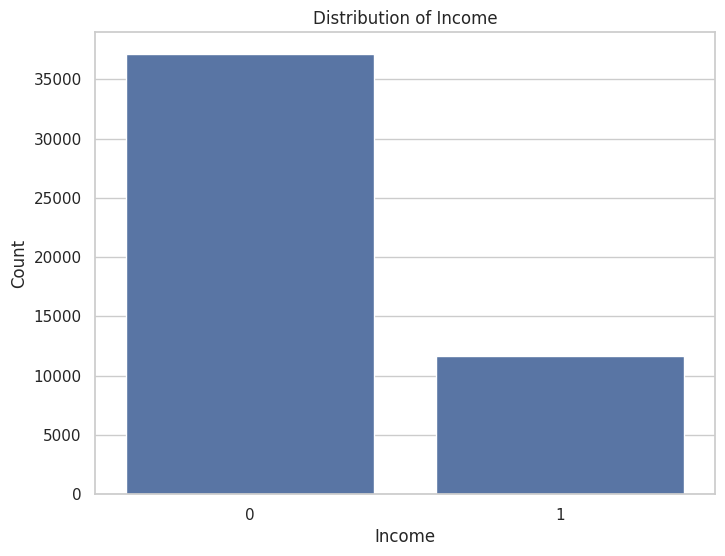

In [82]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=full_df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [83]:
income_counts = full_df['income'].value_counts()
print(income_counts)

0    37109
1    11681
Name: income, dtype: int64


The target variable "Income" is unbalanced, with a greater proportion of samples falling into class 0 than class 1. They chose to employ oversampling, which is the process of creating synthetic samples or randomly replicating minority class samples in order to increase their number. Apply SMOTE to oversample.

# Seperating training and testing dataset

In [84]:
# Separate features and target variable
X = full_df.drop(columns=['income'])
y = full_df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Naive Bayes Model

In [85]:
from sklearn.datasets import make_classification
full_df = make_classification(
    n_features = 15,         #no of features in the dataset
    n_classes = 1,            #no of target variables
    n_samples = 48842,          #no of records in the dataset
    random_state = 1,         #dataset can be reproduced
    n_clusters_per_class= 1,
)

In [86]:
nb_classifier = GaussianNB()

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_resampled, y_train_resampled)

# prediction
y_pred_nb = nb_classifier.predict(X_test)

In [87]:
# Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"The accuracy of the Naive Bayes model is {nb_accuracy*100:.2f}%")

The accuracy of the Naive Bayes model is 81.83%


In [91]:
# Calculate test data accuracy for Naive Bayes
test_accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
print("Test data accuracy for Naive Bayes:", test_accuracy_nb)

# Calculate train data accuracy for Naive Bayes
train_accuracy_nb = accuracy_score(y_train_resampled, nb_classifier.predict(X_train_resampled)) * 100
print("Train data accuracy for Naive Bayes:", train_accuracy_nb)

Test data accuracy for Naive Bayes: 81.8302930928469
Train data accuracy for Naive Bayes: 77.65245747327371


# Randome Forenst Model

In [88]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# prediction
y_pred_rf = rf_classifier.predict(X_test)

In [89]:
# Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"The accuracy of the Random Forest Classifier is {rf_accuracy*100:.2f}%")

The accuracy of the Random Forest Classifier is 88.80%


In [92]:
# Calculate test data accuracy for Random Forest Classifier
test_accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print("Test data accuracy for Random Forest Classifier:", test_accuracy_rf)

# Calculate train data accuracy for Random Forest Classifier
train_accuracy_rf = accuracy_score(y_train_resampled, rf_classifier.predict(X_train_resampled)) * 100
print("Train data accuracy for Random Forest Classifier:", train_accuracy_rf)

Test data accuracy for Random Forest Classifier: 88.79893420782948
Train data accuracy for Random Forest Classifier: 97.21643246150742


# Evaluation using evaluation metrices

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [97]:
#Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

f1_nb = f1_score(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naïve Bayes Classifier Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Confusion Matrix for Naïve Bayes Classifier:")
print(confusion_matrix_nb)

Naïve Bayes Classifier Metrics:
Accuracy: 0.818302930928469
Precision: 0.619707467282525
Recall: 0.6722338204592901
F1 Score: 0.6449028640096134
Confusion Matrix for Naïve Bayes Classifier:
[[6375  988]
 [ 785 1610]]


In [98]:
# Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix_rf)


Random Forest Classifier Metrics:
Accuracy: 0.8879893420782947
Precision: 0.7650651465798045
Recall: 0.7845511482254697
F1 Score: 0.7746856318284889
Confusion Matrix for Random Forest Classifier:
[[6786  577]
 [ 516 1879]]


**Classification Report**

In [101]:
# Generate classification report for Naive Bayes
nb_classification_report = classification_report(y_test, y_pred_nb)
print("Classification Report for Naive Bayes:")
print(nb_classification_report)

# Generate classification report for Random Forest Classifier
rf_classification_report = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest Classifier:")
print(rf_classification_report)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7363
           1       0.62      0.67      0.64      2395

    accuracy                           0.82      9758
   macro avg       0.76      0.77      0.76      9758
weighted avg       0.82      0.82      0.82      9758


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7363
           1       0.77      0.78      0.77      2395

    accuracy                           0.89      9758
   macro avg       0.85      0.85      0.85      9758
weighted avg       0.89      0.89      0.89      9758



**Confussion matrix**

In [110]:
# Create confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Plot confusion matrices
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

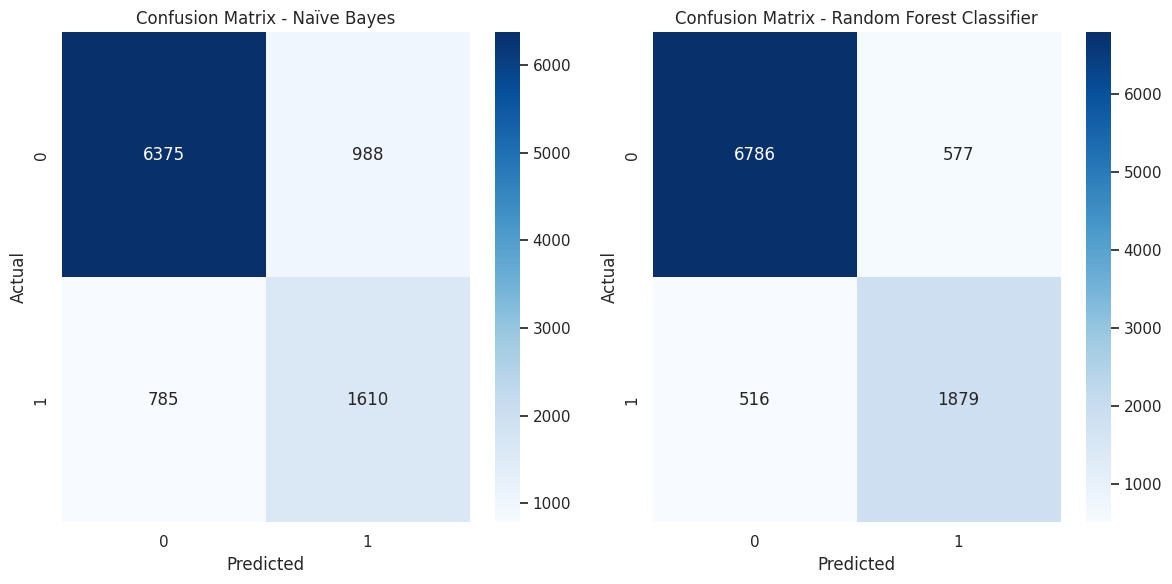

In [111]:
# Plot confusion matrices

#For naive bayes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#For random forest
plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()